# Different ways to load an input graph

We recommend using the GML graph format to load a graph. You can also use the DOT format, which requires additional dependencies (either pydot or pygraphviz). 

DoWhy supports both loading a graph as a string, or as a file (with the extensions 'gml' or 'dot').

Below is an example showing the different ways of loading the same graph. 

In [1]:
import os, sys
import random
sys.path.append(os.path.abspath("../../../"))

In [2]:
import numpy as np
import pandas as pd

import dowhy
from dowhy import CausalModel
from IPython.display import Image, display

## I. Generating dummy data
We generate some dummy data for three variables: X, Y and Z. 

In [3]:
z=[i for i in range(10)]
random.shuffle(z)
df = pd.DataFrame(data = {'Z': z, 'X': range(0,10), 'Y': range(0,100,10)})
df

,Z,X,Y
0,7,0,0
1,0,1,10
2,5,2,20
3,6,3,30
4,8,4,40
5,4,5,50
6,9,6,60
7,2,7,70
8,1,8,80
9,3,9,90


## II. Loading GML or DOT graphs
### GML format

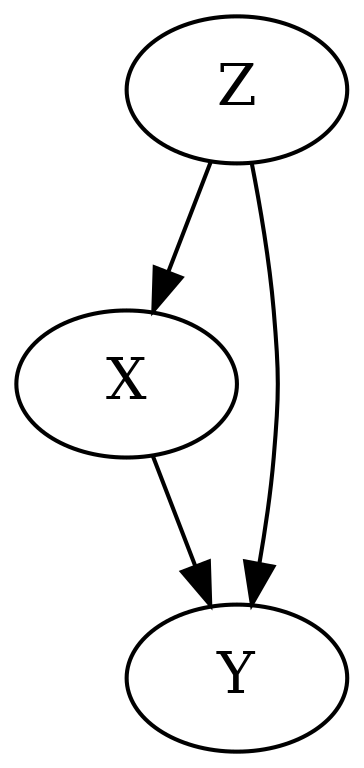

In [4]:
# With GML string
model=CausalModel(
        data = df,
        treatment='X',
        outcome='Y',
        graph="""graph[directed 1 node[id "Z" label "Z"]  
                    node[id "X" label "X"]
                    node[id "Y" label "Y"]      
                    edge[source "Z" target "X"]    
                    edge[source "Z" target "Y"]     
                    edge[source "X" target "Y"]]"""
                    
        )
model.view_model()


display(Image(filename="causal_model.png"))

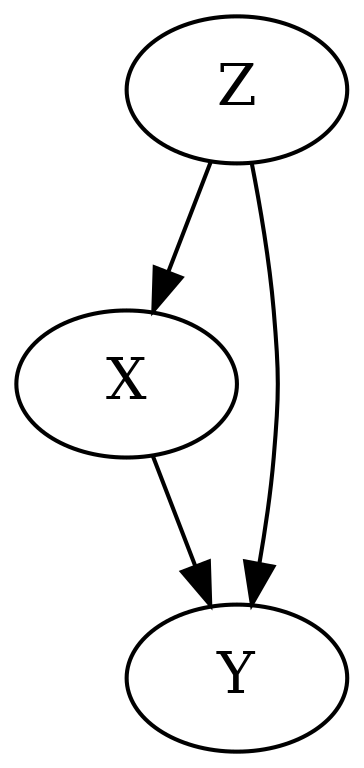

In [5]:
# With GML file
model=CausalModel(
        data = df,
        treatment='X',
        outcome='Y',
        graph="../example_graphs/simple_graph_example.gml"
        )
model.view_model()


display(Image(filename="causal_model.png"))

### DOT format

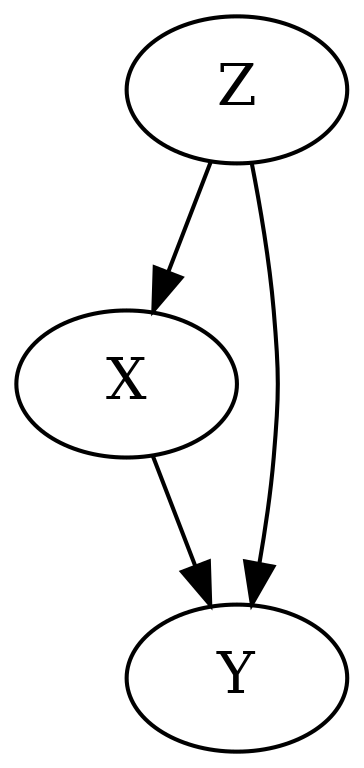

In [6]:
# With DOT string
model=CausalModel(
        data = df,
        treatment='X',
        outcome='Y',
        graph="digraph {Z -> X;Z -> Y;X -> Y;}"
        )
model.view_model()

from IPython.display import Image, display
display(Image(filename="causal_model.png"))

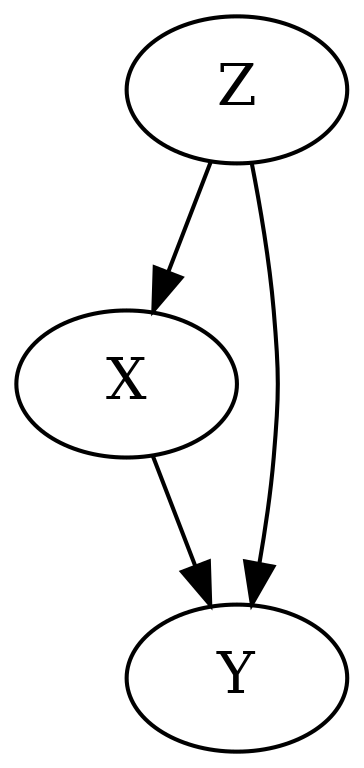

In [7]:
# With DOT file
model=CausalModel(
        data = df,
        treatment='X',
        outcome='Y',
        graph="../example_graphs/simple_graph_example.dot"
        )
model.view_model()


display(Image(filename="causal_model.png"))